# Data Exploration of Water Level of the Rhine

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
data = pd.read_csv('data/Kaub_Level_Since_2013.csv')

In [76]:
print(data.head())


         date  level
0  2013-01-01    510
1  2013-01-02    461
2  2013-01-03    414
3  2013-01-04    378
4  2013-01-05    351


In [77]:
print(data.describe(), '\n')


             level
count  3224.000000
mean    206.495658
std     102.425145
min      20.000000
25%     139.000000
50%     187.000000
75%     253.000000
max     713.000000 



In [78]:
print(data.isna().any(), '\n')


date     False
level    False
dtype: bool 



Show the timeseries data and use Linear Regression to recognize a trend in data

m is: -0.012579379122448381; b is: 226.7673270240638


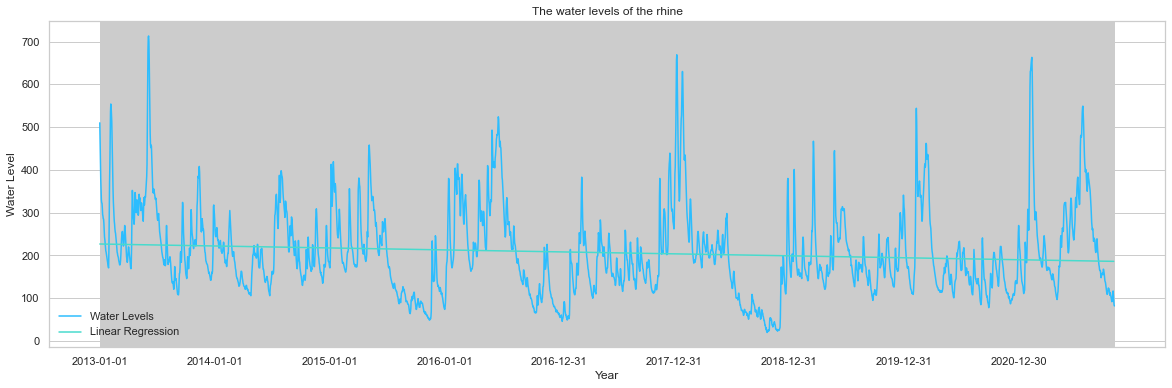

In [79]:
plt.figure(1, figsize=(20,6))
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
color_list = [CB91_Blue, CB91_Green]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.plot(np.arange(len(data.index)), data['level'])
m, b = np.polyfit(np.arange(len(data.index)), data['level'], 1)
plt.plot(data['date'], m * np.arange(len(data.index)) + b)

n = 365
ax = plt.gca()
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.xlabel('Year')
plt.ylabel('Water Level')
plt.title('The water levels of the rhine')
plt.legend(['Water Levels', 'Linear Regression'], frameon=False)
print('m is: {}; b is: {}'.format(m, b))

In [80]:
monthly_data = data.copy()

In [81]:
tdi = pd.DatetimeIndex(data.date)
data.set_index(tdi, inplace=True)
data.drop(columns='date', inplace=True)
data.index.name = 'datetimeindex'
print(data)

               level
datetimeindex       
2013-01-01       510
2013-01-02       461
2013-01-03       414
2013-01-04       378
2013-01-05       351
...              ...
2021-10-23       117
2021-10-24       105
2021-10-25        93
2021-10-26        85
2021-10-27        82

[3224 rows x 1 columns]


In [82]:
result_add = seasonal_decompose(x=data, model='additive', period=91)

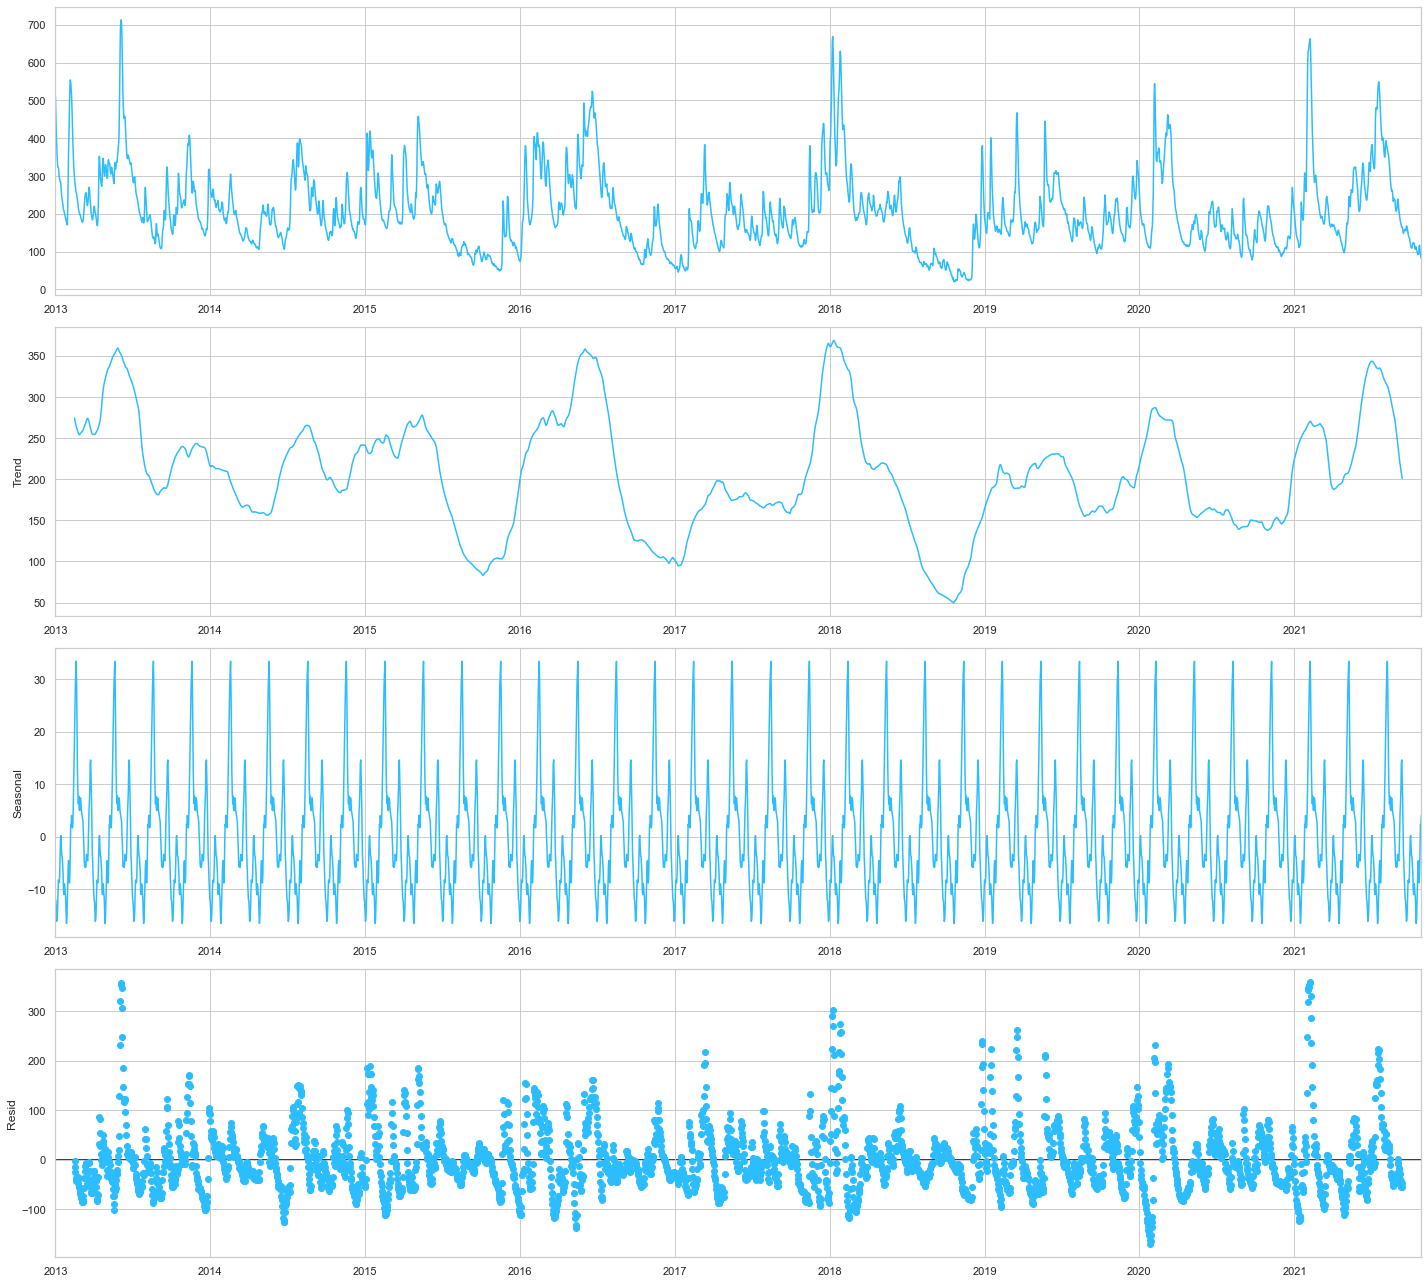

In [83]:
plt.rc("figure", figsize=(20,18))
result_add.plot()
plt.show()

Show distribution of data by using a Box Plot. The Box shows the quartiles of the dataset, the whiskers show the rest of the distribution

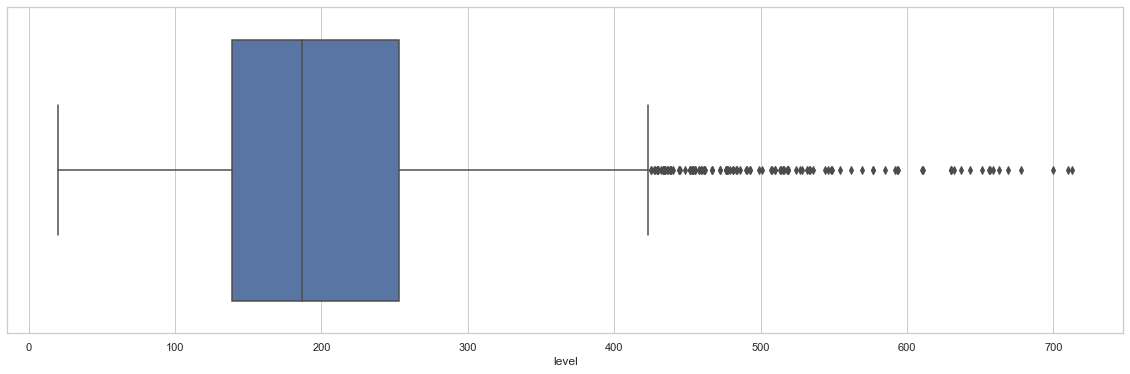

In [84]:
plt.figure(2, figsize=(20,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data['level'])


In [85]:
print(data)

               level
datetimeindex       
2013-01-01       510
2013-01-02       461
2013-01-03       414
2013-01-04       378
2013-01-05       351
...              ...
2021-10-23       117
2021-10-24       105
2021-10-25        93
2021-10-26        85
2021-10-27        82

[3224 rows x 1 columns]


The Box Plot shows, that while most of the time, the rhine water level is at around 120 to 250, the level sometimes rises thrice the size of the average.

Split data according to months in order to see the variation in water levels per month since intuitively, the month is of great concern when looking at water levels

In [86]:
def split_data_monthly(data):
    monthly_data['month'] = pd.DatetimeIndex(monthly_data['date']).month_name()
    monthly_median = monthly_data.groupby('month').agg(
        {'level': np.median}).reset_index()
    monthly_mean = monthly_data.groupby('month').agg({'level': np.mean}).reset_index()
    return monthly_mean, monthly_median

monthly_mean, monthly_median = split_data_monthly(data)

[Text(0.5, 1.0, 'Mean of Rhine Water Levels per Month')]

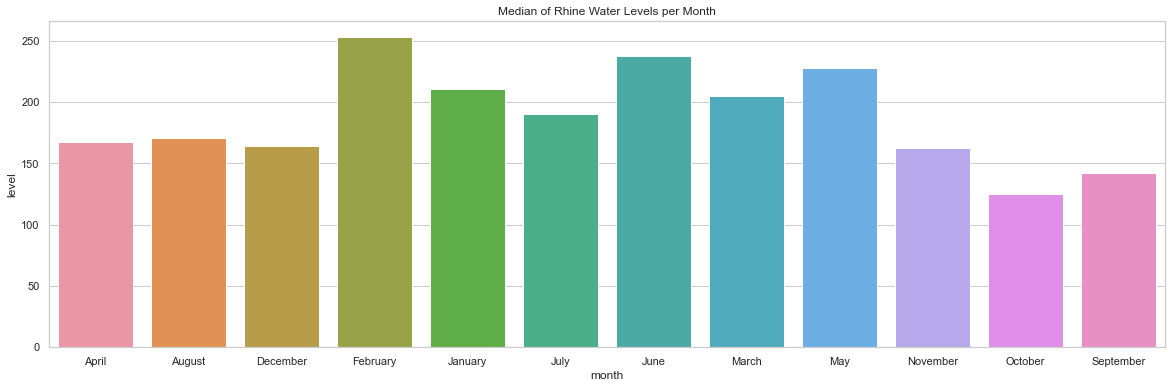

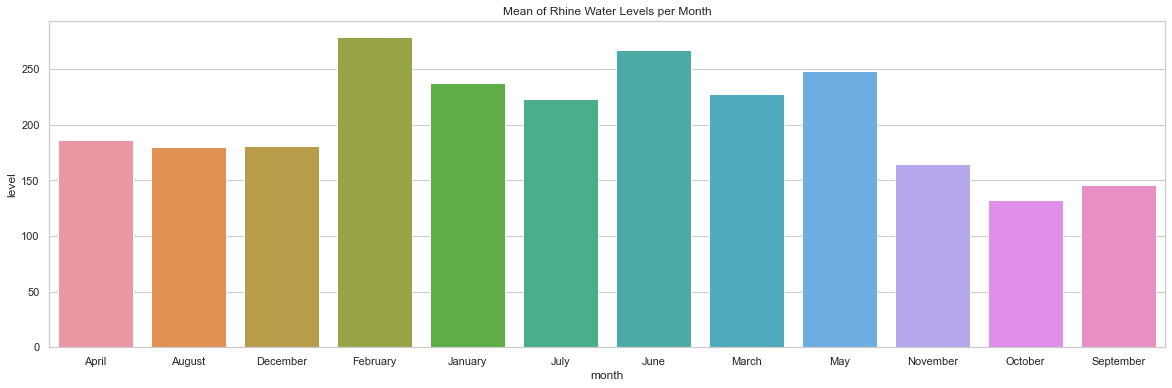

In [89]:
plt.figure(3, figsize=(20,6))
sns.barplot(x="month", y="level", data=monthly_median).set(title='Median of Rhine Water Levels per Month')
plt.figure(4, figsize=(20,6))
sns.barplot(x="month", y="level", data=monthly_mean).set(title='Mean of Rhine Water Levels per Month')




In [88]:
quantile1, quantile3 = data['level'].quantile([0.25, 0.75])
IQR = quantile3 - quantile1
lower = quantile1 - (1.5 * IQR)
upper = quantile3 + (1.5 * IQR)
outlier = []
for level in data['level']:
    if level < lower or level > upper:
        outlier.append(level)

print('We have {} outlier in our data from a total of {} data points. \nThat makes {}% of the data outliers'.format(
    len(outlier), len(data['level']), round(len(outlier) / len(data['level']) * 100, 3)))





We have 122 outlier in our data from a total of 3224 data points. 
That makes 3.784% of the data outliers


Next: Use Auto Regressive Integrated Moving Average models (ARIMA) or Seasonal Autoregressive Integrated Moving Average (SARIMA). 